In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pytrends.request import TrendReq 

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [2]:
data = pd.read_csv("covid_19_data.csv")
print(data)

           SNo ObservationDate     Province/State  Country/Region          Last Update  Confirmed  Deaths  Recovered
0            1      01/22/2020              Anhui  Mainland China      1/22/2020 17:00        1.0     0.0        0.0
1            2      01/22/2020            Beijing  Mainland China      1/22/2020 17:00       14.0     0.0        0.0
2            3      01/22/2020          Chongqing  Mainland China      1/22/2020 17:00        6.0     0.0        0.0
3            4      01/22/2020             Fujian  Mainland China      1/22/2020 17:00        1.0     0.0        0.0
4            5      01/22/2020              Gansu  Mainland China      1/22/2020 17:00        0.0     0.0        0.0
...        ...             ...                ...             ...                  ...        ...     ...        ...
306424  306425      05/29/2021  Zaporizhia Oblast         Ukraine  2021-05-30 04:20:55   102641.0  2335.0    95289.0
306425  306426      05/29/2021            Zeeland     Netherland

In [3]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])

In [4]:
test = data['Confirmed'].groupby(data['ObservationDate'].dt.to_period('D')).sum()
df = pd.DataFrame(data=test, columns=['Date', 'Confirmed'])
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)
df['Date'] = df['Date'].dt.to_timestamp('s').dt.strftime('%m-%d-%Y')

In [5]:
test2 = data['Recovered'].groupby(data['ObservationDate'].dt.to_period('D')).sum()
df2 = pd.DataFrame(data=test2, columns=['Date', 'Recovered'])
df2['Date'] = df2.index
df2.reset_index(drop=True, inplace=True)
df2['Date'] = df2['Date'].dt.to_timestamp('s').dt.strftime('%m-%d-%Y')

In [6]:
df['Recovered'] = df2['Recovered']
df 

,Date,Confirmed,Recovered
0,01-22-2020,557.0,30.0
1,01-23-2020,1097.0,60.0
2,01-24-2020,941.0,39.0
3,01-25-2020,1437.0,42.0
4,01-26-2020,2118.0,56.0
...,...,...,...
489,05-25-2021,167848207.0,104824935.0
490,05-26-2021,168416423.0,105380748.0
491,05-27-2021,168970791.0,106078106.0
492,05-28-2021,169470725.0,106633069.0


In [7]:
start_date = '02-22-2020' 
end_date = '06-22-2020'    

filter_condition = (df['Date'] > start_date) & (df['Date'] <= end_date)

new_data = df.loc[filter_condition]

new_data

,Date,Confirmed,Recovered
32,02-23-2020,78985.0,23394.0
33,02-24-2020,79570.0,25227.0
34,02-25-2020,80415.0,27905.0
35,02-26-2020,81397.0,30386.0
36,02-27-2020,82756.0,33278.0
...,...,...,...
489,05-25-2021,167848207.0,104824935.0
490,05-26-2021,168416423.0,105380748.0
491,05-27-2021,168970791.0,106078106.0
492,05-28-2021,169470725.0,106633069.0


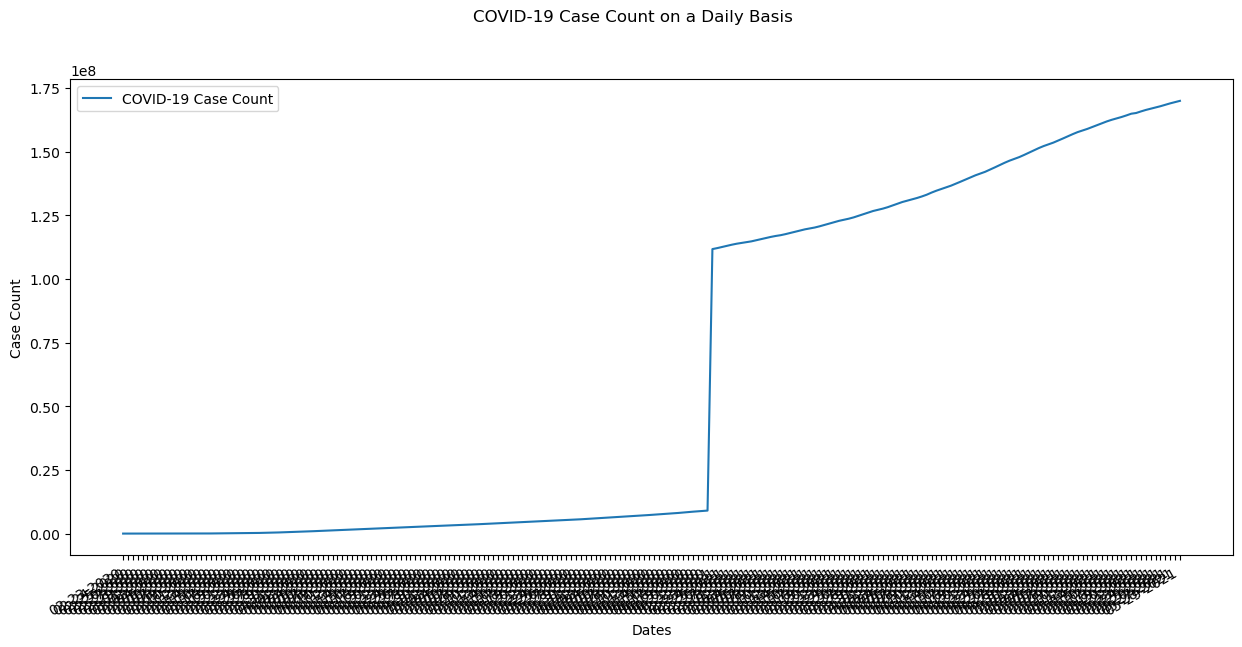

In [8]:
dates = new_data['Date']
cases = new_data['Confirmed']

plt.rcParams['figure.figsize'] = [15, 7]
#plt.plot_date(dates, cases)

# Transform daily case numbers into cumulative totals according to the table.
plt.plot(dates, cases)

# Add legend to the chart:
plt.legend(["COVID-19 Case Count"])

# Information / Caption
plt.suptitle("COVID-19 Case Count on a Daily Basis")
plt.xlabel("Dates")
plt.ylabel("Case Count")
plt.gcf().autofmt_xdate()
plt.show

plt.savefig("COVID-19-Case-Count.png")

In [9]:
# Using pytrends to access trend analysis results on desired keywords via the Google Trends API.

# Keywords = [Travel, Flight, Hotel, Corona]
pytrends = TrendReq()

keywords = ['Travel', 'Flight', 'Hotel', 'Corona']
pytrends.build_payload(keywords, timeframe='2020-01-22 2020-06-22')

trend_data = pytrends.interest_over_time()
trend_data

,Travel,Flight,Hotel,Corona,isPartial
date,,,,,
2020-01-22,4,4,19,2,False
2020-01-23,4,4,22,3,False
2020-01-24,4,4,21,4,False
2020-01-25,4,5,20,7,False
2020-01-26,3,4,20,8,False
...,...,...,...,...,...
2020-06-18,3,2,13,15,False
2020-06-19,3,2,12,13,False
2020-06-20,3,2,14,15,False


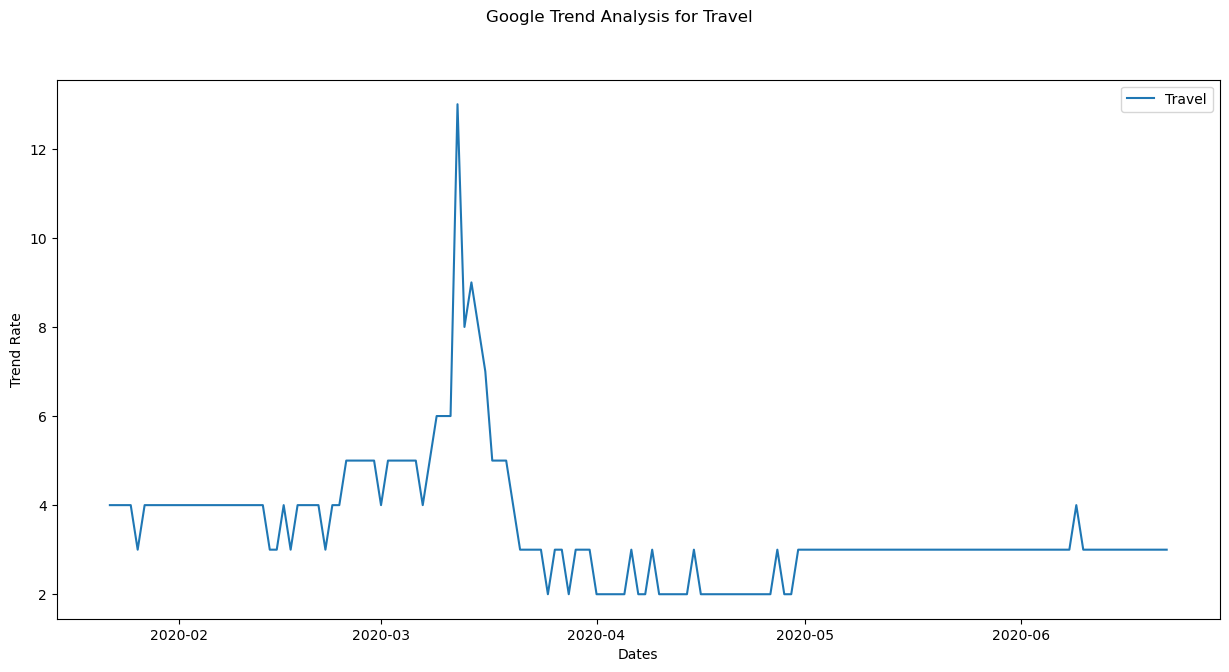

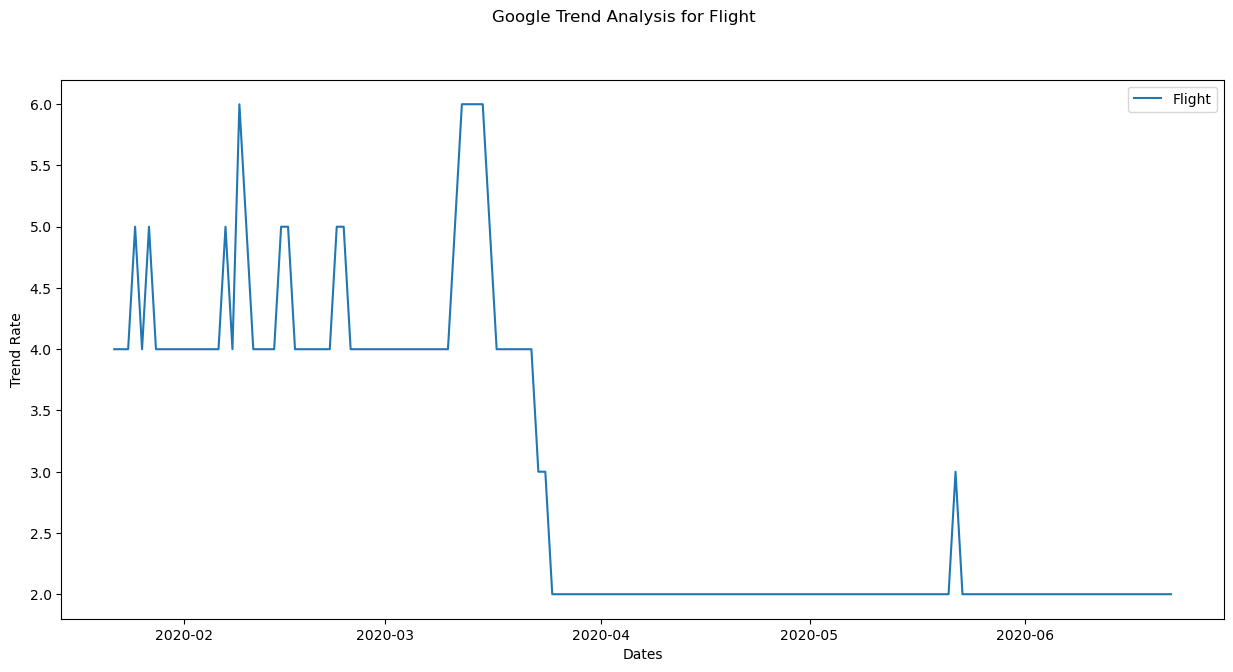

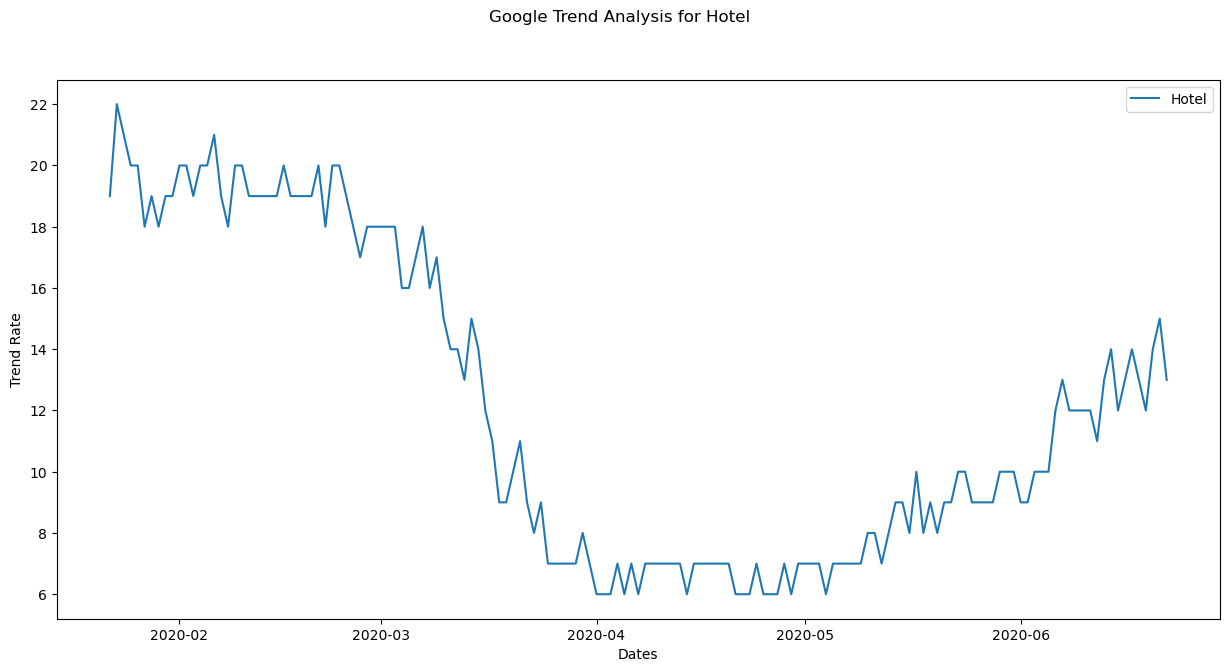

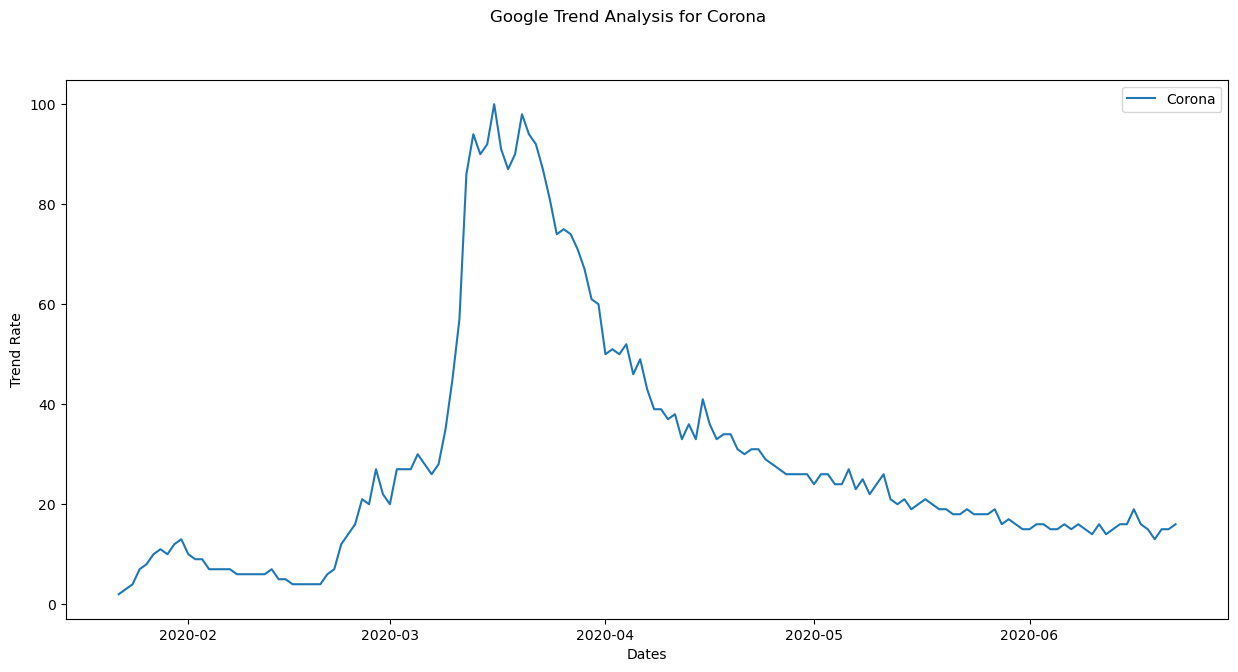

In [10]:
# Printing the data obtained using the Google Trend API separately for each keyword.

for element in keywords:
    # With this for loop, we perform trend analyses one by one for the elements in our keyword list and print them in separate charts.
    plt.plot(trend_data[element])

    # Add legend to the chart:
    plt.legend([element])

    # Information / Caption
    plt.suptitle("Google Trend Analysis for " + element)
    plt.xlabel("Dates")
    plt.ylabel("Trend Rate")
    # To save the prepared figures as .png:
    plt.savefig(str([element]) + "_Trends" + ".png")
    plt.show()
